# Applying SVM to a linear classifiable data set

In this example we will use the **Raisin Dataset Data Set** from the **UCI Machine Learning Repository** 
that can be found in this link:

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset
 
 
 
## Data Set Information

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


## Attribute Information

1.) Area: Gives the number of pixels within the boundaries of the raisin.

2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.

3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.

4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.

5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.

6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.

7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.

8.) Class: Kecimen and Besni raisin.



In [156]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv("./data/raisins.csv")
df = df.dropna()    
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [158]:
def show_correlation_graph(data, title=None, cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    """Utility to plot the correlation graph for the passed in data."""
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()    
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    sns.heatmap(corr, annot=annot, fmt="2.2f", linewidths=linewidths, ax=ax, cmap=cmap)    

### Examing the data

As we can see from the correlation graph there is a high degree 
of correlated data so we will clean it up to make our trainining
process simpler and faster:

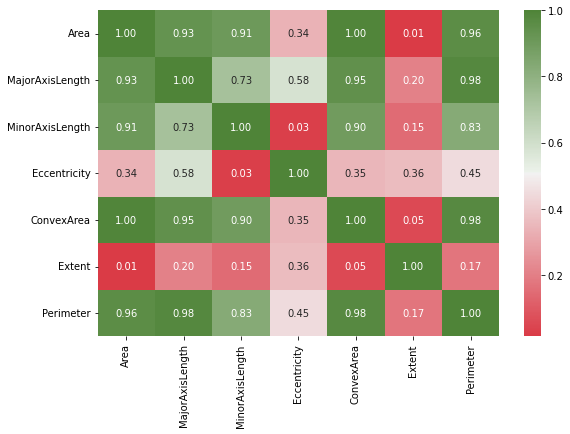

In [159]:
show_correlation_graph(df)

,Area,Eccentricity,Extent,Class
0,87524,0.819738,0.758651,Kecimen
1,75166,0.801805,0.684130,Kecimen
2,90856,0.798354,0.637613,Kecimen
3,45928,0.684989,0.699599,Kecimen
4,79408,0.564011,0.792772,Kecimen
...,...,...,...,...
895,83248,0.817263,0.668793,Besni
896,87350,0.808629,0.636476,Besni
897,99657,0.721684,0.741099,Besni
898,93523,0.845739,0.658798,Besni


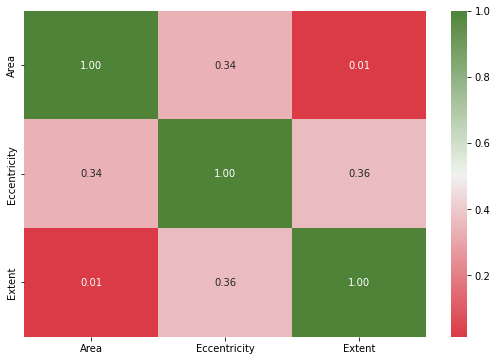

In [160]:
features = df.copy()
corr_matrix = features.corr().abs()
corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]
uncorrelated = features.drop(to_drop, axis=1)
uncorrelated = uncorrelated.dropna()    
display(uncorrelated)
show_correlation_graph(uncorrelated)

After removing correlated data we are left with only 3 features that are 
nor correlated.

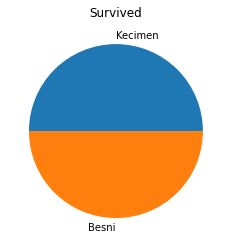

In [161]:
df = uncorrelated
Kecimen = df[df.Class == "Kecimen"].shape[0]
Besni = df[df.Class == "Besni"].shape[0]
counters = [Kecimen, Besni]
_ = plt.pie(counters, labels=[f"Kecimen", "Besni"])
_ = plt.title("Survived")

In [162]:
data = df.replace("Kecimen", 1)
data = data.replace("Besni", 0)
data

,Area,Eccentricity,Extent,Class
0,87524,0.819738,0.758651,1
1,75166,0.801805,0.684130,1
2,90856,0.798354,0.637613,1
3,45928,0.684989,0.699599,1
4,79408,0.564011,0.792772,1
...,...,...,...,...
895,83248,0.817263,0.668793,0
896,87350,0.808629,0.636476,0
897,99657,0.721684,0.741099,0
898,93523,0.845739,0.658798,0


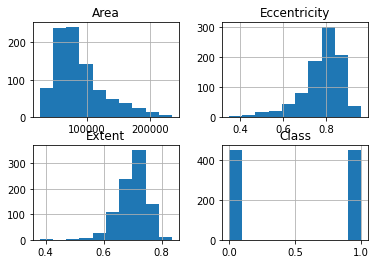

In [163]:
_ = data.hist()

In [164]:
X = data
X_norm = (X - X.min())/(X.max() - X.min())
X_norm = X_norm.sample(frac=1)
X_norm

,Area,Eccentricity,Extent,Class
762,0.398855,0.793837,0.529143,0.0
202,0.235505,0.700675,0.672208,1.0
87,0.067109,0.586843,0.697369,1.0
298,0.379820,0.603534,0.734770,1.0
844,0.340432,0.727877,0.897341,0.0
...,...,...,...,...
508,0.513756,0.915788,0.444778,0.0
452,0.334632,0.826784,0.752693,0.0
381,0.027902,0.746667,0.513730,1.0
521,0.280969,0.824669,0.721237,0.0


In [165]:
X_norm.isnull().sum()

Area            0
Eccentricity    0
Extent          0
Class           0
dtype: int64

In [191]:
X = X_norm[["Area", "Extent"]].copy()
Y = X_norm[["Class"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Number of rows")
print("Train", X_train.shape[0])
print("Test", X_test.shape[0])

Number of rows
Train 720
Test 180


In [192]:
clf=SVC(kernel='linear', C=1.0) 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Accuracy : 0.8722
Accuracy : 0.8722


In [193]:
y_pred=clf.predict(X_train)

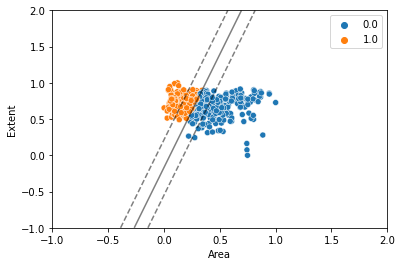

In [195]:

_ = sns.scatterplot(x = X_train["Area"], y = X_train["Extent"], hue=y_pred)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)